# Software Engineer Salaries
 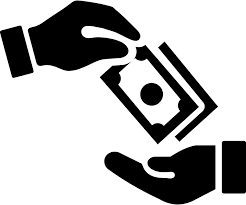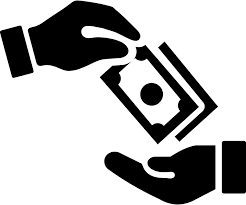

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import re

In [49]:
data=pd.read_csv("Software Engineer Salaries.csv")

In [50]:
len(data)

870

In [81]:
type(data)

pandas.core.frame.DataFrame

In [85]:
data.describe()

,Company Score,Days Since Posting,Average Salary
count,789.000000,870.000000,737.000000
mean,3.895311,13.432184,127957.937585
std,0.524952,11.148000,47242.310107
min,1.000000,1.000000,6500.000000
25%,3.600000,3.000000,98000.000000
50%,3.900000,10.000000,117500.000000
75%,4.200000,26.750000,148000.000000
max,5.000000,30.000000,490000.000000


In [84]:
data.nunique()

Company               648
Company Score          30
Job Title             542
Location              330
Date                   31
Salary                681
Main Job Title        313
Days Since Posting     29
Average Salary        259
Estimate Type           2
Employer est            2
Glassdoor est           2
City                  323
State                  45
Remote                  2
dtype: int64

In [89]:
[data.columns]

[Index(['Company', 'Company Score', 'Job Title', 'Location', 'Date', 'Salary',
        'Main Job Title', 'Days Since Posting', 'Average Salary',
        'Estimate Type', 'Employer est', 'Glassdoor est', 'City', 'State',
        'Remote'],
       dtype='object')]

In [92]:
data.dtypes

Company                object
Company Score         float64
Job Title              object
Location               object
Date                   object
Salary                 object
Main Job Title         object
Days Since Posting    float64
Average Salary        float64
Estimate Type          object
Employer est             bool
Glassdoor est            bool
City                   object
State                  object
Remote                   bool
dtype: object

In [51]:
data.head(10)

,Company,Company Score,Job Title,Location,Date,Salary
0,ViewSoft,4.8,Software Engineer,"Manassas, VA",8d,$68K - $94K (Glassdoor est.)
1,Workiva,4.3,Software Support Engineer,Remote,2d,$61K - $104K (Employer est.)
2,"Garmin International, Inc.",3.9,C# Software Engineer,"Cary, NC",2d,$95K - $118K (Glassdoor est.)
3,Snapchat,3.5,"Software Engineer, Fullstack, 1+ Years of Expe...","Los Angeles, CA",2d,$97K - $145K (Employer est.)
4,Vitesco Technologies Group AG,3.1,Software Engineer,"Seguin, TX",2d,$85K - $108K (Glassdoor est.)
5,Spotify,3.9,Backend Engineer II,"New York, NY",1d,$123K - $175K (Employer est.)
6,Infor,4.0,Associate Software Engineer,"Alpharetta, GA",7d,$77K - $94K (Glassdoor est.)
7,Amerisoft Corporation,5.0,Software Developers,"Farmington Hills, MI",30d+,$71K - $100K (Glassdoor est.)
8,WHOOP,3.3,"Software Engineer II (Backend, Health)","Boston, MA",10d,$94K - $148K (Glassdoor est.)
9,PFF,4.2,Sr. Software Engineer,Remote,1d,$147K - $189K (Employer est.)


In [52]:
data.tail(10)

,Company,Company Score,Job Title,Location,Date,Salary
860,Westchester Community College,NaN,Software Development Engineer in Test,"San Francisco, CA",30d+,NaN
861,DPS Telecom,NaN,Software & System Dev. Sr. Engineer,"Raymond, OH",30d+,NaN
862,Roblox,NaN,Software Engineer II,"Valhalla, NY",3d,NaN
863,OpenAI,NaN,Embedded Software Engineer (Entry-Level),"Lake Hopatcong, NJ",2d,NaN
864,"Akina, Inc.",NaN,Senior Software Engineer - App Orchestration,"San Mateo, CA",30d+,NaN
865,RXO,NaN,"Software Engineer, Machine Learning Compute","San Francisco, CA",6d,NaN
866,Infosys,NaN,Software Engineer - 3 (Apache NiFi),"Annapolis Junction, MD",18d,NaN
867,Medtronic,NaN,Senior Software Engineer,"Southfield, MI",19d,NaN
868,NaN,NaN,Junior Python Developer,"Charlotte, NC",2d,NaN
869,NaN,NaN,GUI Software Engineer II - Surgical Robotics,"Boston, MA",10d,NaN


In [53]:
data.shape

(870, 6)

In [54]:
data.loc[[10,100],["Salary"]]

,Salary
10,$90K - $113K (Employer est.)
100,$79K - $120K (Glassdoor est.)


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 870 entries, 0 to 869
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        868 non-null    object 
 1   Company Score  789 non-null    float64
 2   Job Title      870 non-null    object 
 3   Location       857 non-null    object 
 4   Date           870 non-null    object 
 5   Salary         764 non-null    object 
dtypes: float64(1), object(5)
memory usage: 40.9+ KB


In [56]:
data.isna().sum()

Company            2
Company Score     81
Job Title          0
Location          13
Date               0
Salary           106
dtype: int64

In [57]:
data.describe()

,Company Score
count,789.000000
mean,3.895311
std,0.524952
min,1.000000
25%,3.600000
50%,3.900000
75%,4.200000
max,5.000000


In [58]:
def clean_job_title(title):
    return re.split(r'\(|-|,', title)[0].strip()

data['Main Job Title'] = data['Job Title'].apply(clean_job_title)

def convert_date_to_days(date_str):
    if 'd' in date_str:
        return int(date_str.replace('d', '').replace('+', '').strip())
    elif 'h' in date_str:
        return int(date_str.replace('h', '').strip()) / 24
    elif 'w' in date_str:
        return int(date_str.replace('w', '').strip()) * 7
    else:
        return None

data['Days Since Posting'] = data['Date'].apply(convert_date_to_days)

def extract_salary(salary_str):
    salary_range = re.findall(r'\$([\dK]+)', salary_str)
    salary_type = 'Employer est.' if 'Employer est.' in salary_str else 'Glassdoor est.'
    
    salary_range = [int(s.replace('K', '')) * 1000 for s in salary_range]
    if len(salary_range) == 2:
        return sum(salary_range) / 2, salary_type
    else:
        return None, salary_type


data['Salary'] = data['Salary'].astype(str)
data[['Average Salary', 'Estimate Type']] = data['Salary'].apply(
    lambda x: pd.Series(extract_salary(x))
)

data['Employer est'] = data['Estimate Type'] == 'Employer est.'
data['Glassdoor est'] =data['Estimate Type'] == 'Glassdoor est.'

def extract_location(location):
    parts = location.split(',')
    if len(parts) == 2:
        city = parts[0].strip()
        state = parts[1].strip()
        remote = False
    elif 'Remote' in location:
        city, state = None, None
        remote = True
    else:
        city, state = location, None
        remote = False
    return city, state, remote


data['Location'] = data['Location'].astype(str)
data[['City', 'State', 'Remote']] = data['Location'].apply(
    lambda x: pd.Series(extract_location(x))
)

data_cleaned = data.drop(columns=['Job Title', 'Date', 'Salary', 'Location'])

data_cleaned.head(10)

,Company,Company Score,Main Job Title,Days Since Posting,Average Salary,Estimate Type,Employer est,Glassdoor est,City,State,Remote
0,ViewSoft,4.8,Software Engineer,8.0,81000.0,Glassdoor est.,False,True,Manassas,VA,False
1,Workiva,4.3,Software Support Engineer,2.0,82500.0,Employer est.,True,False,None,None,True
2,"Garmin International, Inc.",3.9,C# Software Engineer,2.0,106500.0,Glassdoor est.,False,True,Cary,NC,False
3,Snapchat,3.5,Software Engineer,2.0,121000.0,Employer est.,True,False,Los Angeles,CA,False
4,Vitesco Technologies Group AG,3.1,Software Engineer,2.0,96500.0,Glassdoor est.,False,True,Seguin,TX,False
5,Spotify,3.9,Backend Engineer II,1.0,149000.0,Employer est.,True,False,New York,NY,False
6,Infor,4.0,Associate Software Engineer,7.0,85500.0,Glassdoor est.,False,True,Alpharetta,GA,False
7,Amerisoft Corporation,5.0,Software Developers,30.0,85500.0,Glassdoor est.,False,True,Farmington Hills,MI,False
8,WHOOP,3.3,Software Engineer II,10.0,121000.0,Glassdoor est.,False,True,Boston,MA,False
9,PFF,4.2,Sr. Software Engineer,1.0,168000.0,Employer est.,True,False,None,None,True


In [59]:
data_cleaned['Average Salary'] = data_cleaned['Average Salary'].fillna(data_cleaned['Average Salary'].mean())
data_cleaned['Company Score'] = data_cleaned['Company Score'].fillna(data_cleaned['Company Score'].mean())
data_cleaned['City'] = data_cleaned['City'].fillna("UnKnown")
data_cleaned['State'] = data_cleaned['State'].fillna("UnKnown")
data_cleaned['Company'] = data_cleaned['Company'].fillna("UnKnown")
data_cleaned

,Company,Company Score,Main Job Title,Days Since Posting,Average Salary,Estimate Type,Employer est,Glassdoor est,City,State,Remote
0,ViewSoft,4.800000,Software Engineer,8.0,81000.000000,Glassdoor est.,False,True,Manassas,VA,False
1,Workiva,4.300000,Software Support Engineer,2.0,82500.000000,Employer est.,True,False,UnKnown,UnKnown,True
2,"Garmin International, Inc.",3.900000,C# Software Engineer,2.0,106500.000000,Glassdoor est.,False,True,Cary,NC,False
3,Snapchat,3.500000,Software Engineer,2.0,121000.000000,Employer est.,True,False,Los Angeles,CA,False
4,Vitesco Technologies Group AG,3.100000,Software Engineer,2.0,96500.000000,Glassdoor est.,False,True,Seguin,TX,False
...,...,...,...,...,...,...,...,...,...,...,...
865,RXO,3.895311,Software Engineer,6.0,127957.937585,Glassdoor est.,False,True,San Francisco,CA,False
866,Infosys,3.895311,Software Engineer,18.0,127957.937585,Glassdoor est.,False,True,Annapolis Junction,MD,False
867,Medtronic,3.895311,Senior Software Engineer,19.0,127957.937585,Glassdoor est.,False,True,Southfield,MI,False
868,UnKnown,3.895311,Junior Python Developer,2.0,127957.937585,Glassdoor est.,False,True,Charlotte,NC,False


In [60]:
data_cleaned.isna().sum()

Company               0
Company Score         0
Main Job Title        0
Days Since Posting    0
Average Salary        0
Estimate Type         0
Employer est          0
Glassdoor est         0
City                  0
State                 0
Remote                0
dtype: int64

In [61]:
data_cleaned.head(20).groupby(['Company'])['Average Salary'].mean()

Company
Amerisoft Corporation             85500.0
Amex                             112500.0
Athenahealth                     240000.0
Garmin International, Inc.       106500.0
HealthMine Services, Inc.         66500.0
Hertz                            179000.0
Honeywell                        113000.0
Infor                             85500.0
Legrand AV                       102500.0
Megaport                         108500.0
PFF                              168000.0
SOFT LABS NA                     106000.0
Salesforce                       101500.0
Snapchat                         105000.0
Spotify                          149000.0
ViewSoft                          81000.0
Vitesco Technologies Group AG     96500.0
WHOOP                            121000.0
Workiva                           82500.0
Name: Average Salary, dtype: float64

In [62]:
data_cleaned.head(20).groupby(['City'])['Average Salary'].mean()

City
Aguadilla                 113000.000000
Alpharetta                 85500.000000
Boston                    180500.000000
Cary                      106500.000000
Farmington Hills           85500.000000
Los Angeles               105000.000000
Manassas                   81000.000000
Minneapolis-Saint Paul    102500.000000
New York                  149000.000000
Northborough              106000.000000
Plantation                112500.000000
San Francisco             101500.000000
Seattle                   179000.000000
Seguin                     96500.000000
UnKnown                   105666.666667
nan                       108500.000000
Name: Average Salary, dtype: float64

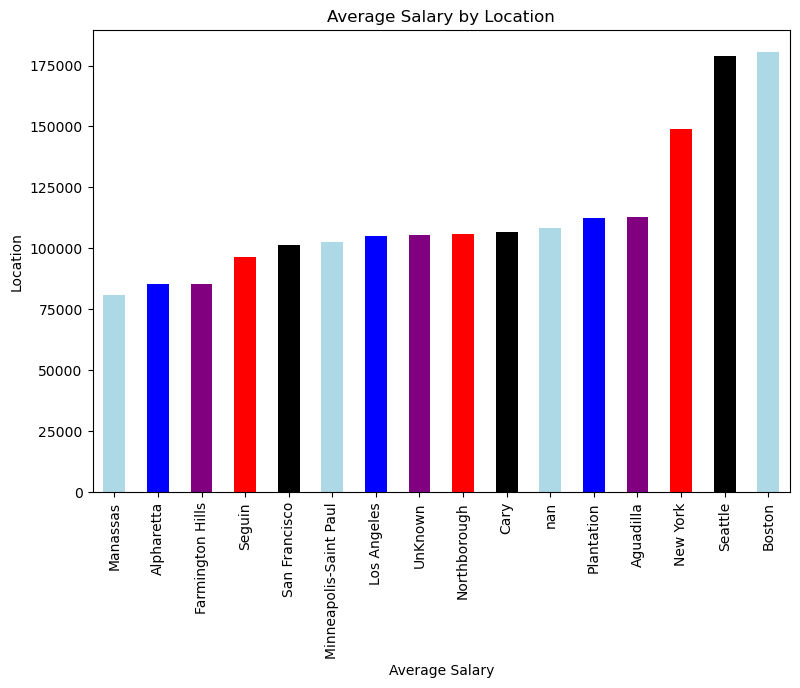

In [63]:
avg_salary_by_location = data_cleaned.head(20).groupby('City')['Average Salary'].mean().sort_values()
color = ['lightblue', 'blue', 'purple', 'red', 'black']
avg_salary_by_location.plot(kind='bar', figsize=(9, 6),color=color)
plt.title('Average Salary by Location')
plt.xlabel('Average Salary')
plt.ylabel('Location',)
plt.show()

In [64]:
data_cleaned.head(20).groupby(['Main Job Title'])['Average Salary'].mean()

Main Job Title
Associate Software Engineer                         85500.0
Backend Engineer II                                149000.0
C# Software Engineer                               106500.0
Entry Level to Senior Level Software Developers    106000.0
Frontend Software Engineer                         108500.0
Java Engineer                                      112500.0
MTS Software Engineer                              101500.0
Software Developers                                 85500.0
Software Engineer                                  121937.5
Software Engineer I                                113000.0
Software Engineer II                               121000.0
Software Support Engineer                           82500.0
Sr. Software Engineer                              168000.0
Name: Average Salary, dtype: float64

In [65]:
data_cleaned.head(20).groupby(['Company'])['Company Score'].mean()

Company
Amerisoft Corporation            5.0
Amex                             4.1
Athenahealth                     4.0
Garmin International, Inc.       3.9
HealthMine Services, Inc.        3.8
Hertz                            3.2
Honeywell                        4.1
Infor                            4.0
Legrand AV                       3.7
Megaport                         3.4
PFF                              4.2
SOFT LABS NA                     5.0
Salesforce                       4.1
Snapchat                         3.5
Spotify                          3.9
ViewSoft                         4.8
Vitesco Technologies Group AG    3.1
WHOOP                            3.3
Workiva                          4.3
Name: Company Score, dtype: float64

In [66]:
data_cleaned.sample(20)['Company Score']

602    3.900000
179    3.600000
454    3.100000
107    4.700000
377    3.800000
68     3.100000
772    4.500000
634    3.700000
24     4.100000
81     3.400000
751    3.400000
715    3.800000
787    3.800000
773    4.000000
846    3.895311
821    3.895311
64     3.800000
689    4.000000
330    3.100000
383    3.900000
Name: Company Score, dtype: float64

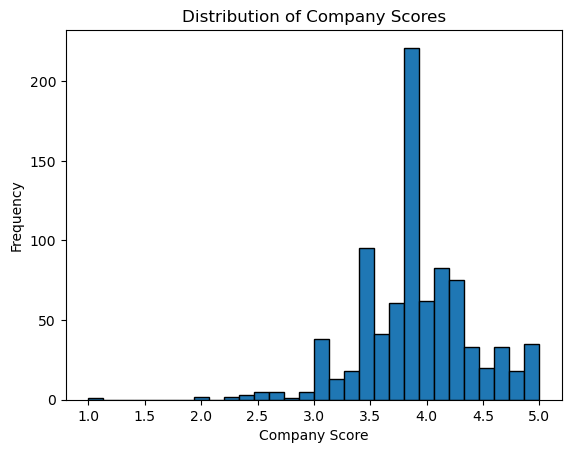

In [67]:
data_cleaned['Company Score'].hist(bins=30,grid=False,edgecolor="black")
plt.title('Distribution of Company Scores')
plt.xlabel('Company Score')
plt.ylabel('Frequency')
plt.show()

In [68]:
data_cleaned['Average Salary'].min()

6500.0

In [69]:
data_cleaned[data['Average Salary']==6500.0]

,Company,Company Score,Main Job Title,Days Since Posting,Average Salary,Estimate Type,Employer est,Glassdoor est,City,State,Remote
69,KAIROS Inc,3.5,Software Engineer,16.0,6500.0,Employer est.,True,False,Dahlgren,VA,False


In [70]:
data_cleaned['Average Salary'].max()

490000.0

In [71]:
data_cleaned[data['Average Salary']==490000.0]

,Company,Company Score,Main Job Title,Days Since Posting,Average Salary,Estimate Type,Employer est,Glassdoor est,City,State,Remote
526,BOEING,4.0,Senior Software Engineer,30.0,490000.0,Employer est.,True,False,Washington,DC,False


In [72]:
data_cleaned['Average Salary'].value_counts()

127957.937585    133
95000.000000      12
135000.000000     11
99500.000000      11
106000.000000      9
                ... 
141000.000000      1
159500.000000      1
182000.000000      1
152000.000000      1
259000.000000      1
Name: Average Salary, Length: 260, dtype: int64

In [73]:
data_cleaned[data_cleaned['Average Salary']==95000.0]

,Company,Company Score,Main Job Title,Days Since Posting,Average Salary,Estimate Type,Employer est,Glassdoor est,City,State,Remote
56,"Sonalysts, Inc.",3.8,Junior Software Engineer,1.0,95000.0,Employer est.,True,False,Waterford,CT,False
58,HealthStream,3.6,Software Developer,10.0,95000.0,Glassdoor est.,False,True,Nashville,TN,False
88,Synergy ECP,4.4,Junior Software Engineer,2.0,95000.0,Glassdoor est.,False,True,Fort Meade,MD,False
94,Vibrint,3.5,Software Engineer I,11.0,95000.0,Employer est.,True,False,United States,UnKnown,False
178,Origence,4.0,Software Engineer,1.0,95000.0,Glassdoor est.,False,True,UnKnown,UnKnown,True
264,Flysoft,5.0,Software Engineer,2.0,95000.0,Glassdoor est.,False,True,nan,UnKnown,False
276,Airgas,4.1,Software Engineer,12.0,95000.0,Glassdoor est.,False,True,Lehi,UT,False
454,Q9Software,3.1,IoT Engineer,27.0,95000.0,Employer est.,True,False,Milwaukee,WI,False
471,Fusion Innovation,5.0,Software Engineer,3.0,95000.0,Employer est.,True,False,Norcross,GA,False
497,"Clarity Innovations, LLC",3.4,Software Engineer,13.0,95000.0,Employer est.,True,False,Denver,CO,False


In [74]:
data_cleaned.describe()

,Company Score,Days Since Posting,Average Salary
count,870.000000,870.000000,870.000000
mean,3.895311,13.432184,127957.937585
std,0.499888,11.148000,43477.057639
min,1.000000,1.000000,6500.000000
25%,3.600000,3.000000,101125.000000
50%,3.895311,10.000000,126000.000000
75%,4.100000,26.750000,138875.000000
max,5.000000,30.000000,490000.000000


In [75]:
city_salary=data_cleaned.sample(20).groupby(['City'])['Average Salary'].mean()

In [76]:
city_salary

City
Atlanta          127957.937585
Auburn Hills      85000.000000
Boston           153228.968792
Chantilly        177000.000000
Chicago           80000.000000
Columbia         192500.000000
Elkridge         272500.000000
Fall River        15000.000000
Lakeland          90000.000000
Las Vegas        127957.937585
Lenexa           127957.937585
Palo Alto        127957.937585
Raleigh          127957.937585
San Francisco    190000.000000
San Jose          97000.000000
Texas            127957.937585
Tukwila          127957.937585
UnKnown          127957.937585
United States    197500.000000
Name: Average Salary, dtype: float64

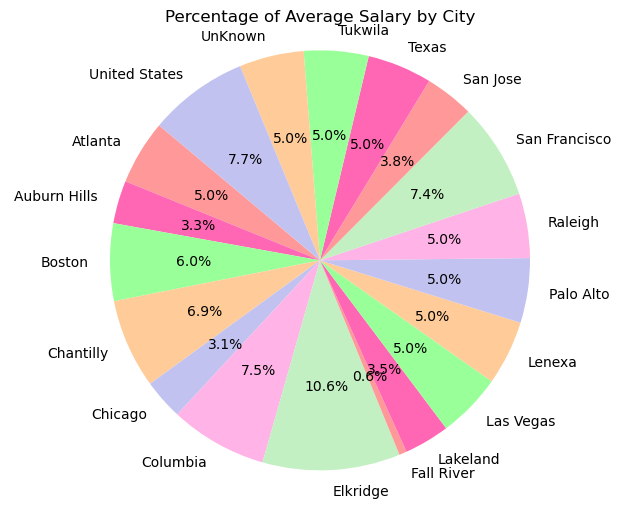

In [80]:
labels = city_salary.index
sizes = city_salary.values
custom_colors = ['#ff9999', '#ff66b3', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#c2f0c2']

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels,colors=custom_colors, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Average Salary by City')
plt.axis('equal')
plt.show()

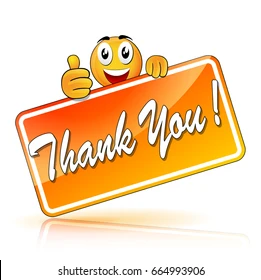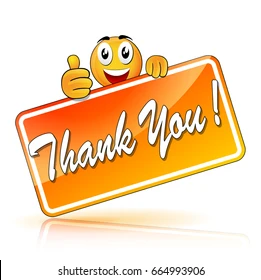